<a href="https://colab.research.google.com/github/jpdosher/projetos_EDA/blob/main/cub_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='DarkBlue'>**Índice CUB Brasil** 

O objetivo deste notebook é a princípio fazer uma boa análise dos dados e testar/aprender um pouco.

O Custo Unitário Básico de Construção (CUB) é um indicador de custos no setor da construção calculado e divulgado pelos Sinduscons estatuais e regido pela Lei Federal 4.591/64.
O CUB Brasil é uma média ponderada dos indicadores de alguns dos principais estados da federação. Este tópico contém informações sobre a evolução do CUB Brasil e dos estados que o compõem.

**Fontes:**
> CBIC-Câmara Brasileira da Indústria da Construção - "http://www.cbicdados.com.br/menu/custo-da-construcao/cub-medio-brasil-custo-unitario-basico-de-construcao-por-m2"


>SINAPI: https://www.caixa.gov.br/poder-publico/modernizacao-gestao/sinapi/Paginas/default.aspx

>Câmara brasileira da industria da Construção: http://www.cub.org.br/cub-m2-brasil



#<font color='DarkBlue'>Importando dados, pré-visualização, pré-análise e primeiras transformações

### Montando drive
"drive.mount('/content/drive/Mydrive')"



 Após a montagem é necessário autenticação para vinvular a conta do Drive com o Colab.

>O Colab disponibilizou uma função de mount direto no menu de arquivos do notebook. Então, pare este notebook deixarei apenas como notação "carregando pacote" e "montando drive" via código.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Dataset/df_cub_index.csv',parse_dates=True) 
#leitura do arquivo do Google Drive

---

## Pré-visualizando os dados carregados

Vamos dar uma olhada nesses dados :

In [ ]:
df.shape

(3548, 9)

In [ ]:
df.head()

,year,month,state,global_value,cm_value,cmo_value,cda_value,ce_value,ca50_value
0,2007,2,AL,611.28,325.22,242.30,26.49,17.27,2.630
1,2007,3,AL,606.19,334.63,242.30,22.75,6.51,2.625
2,2007,4,AL,613.36,341.80,242.30,22.75,6.51,2.630
3,2007,5,AL,619.35,336.79,254.65,21.40,6.51,2.635
4,2007,6,AL,617.76,334.43,254.65,22.28,6.40,2.660


In [ ]:
df.tail()

,year,month,state,global_value,cm_value,cmo_value,cda_value,ce_value,ca50_value
3543,2021,3,SC,2171.33,819.38,1300.81,47.63,3.52,6.35
3544,2021,4,SC,2203.29,848.55,1303.66,47.50,3.58,6.78
3545,2021,5,SC,2253.79,879.74,1322.23,48.22,3.61,6.86
3546,2021,6,SC,2307.92,896.13,1358.30,49.74,3.75,6.87
3547,2021,7,SC,2329.85,909.25,1366.99,49.84,3.78,7.12


---
Descrição das colunas, segundo o  do provedor do DataSet:




* state: unidade federativa do brasil

* globalvalue: valor total 

* cmvalue: valor componentes materiais

* cmovalue: valor componentes mão de obra 

* cdavalue: valor componentes despesa administrativa

* ce_value: valor componentes equipamento

* (globalvalue = cmvalue + cmovalue + cdavalue + ce_value )

> **Todas as colunas de valor utilizam a unidade R$/m²

* ca50_value: evolução do valor do aço ca50 10mm no período (R$/Kg)

---

### Testes do tutorial do Kaggle

In [ ]:
#Testes do tutorial do Kaggle de Pandas
## Qual foram os últimos dados adquiridos (ano)?
df.year.unique()#Qual último mês de dados adquiridos do ano de 2021?
ano_2021 = df.loc[df.year == 2021]
lista_mes_2021 = list(ano_2021.month.unique())
lista_mes_2021[-1:]
#Visualizando os últmos dados obtidos de todos os estados em 2021
mes_7_ano_2021 = ano_2021.loc[ano_2021.month == 7]
#//mes_7_ano_2021
# em caso de necessidade de ordenação ascendente pela coluna 'state':
ordenacao_mes = mes_7_ano_2021.sort_values(by =['state'])
#//ordenacao_mes
#removendo colunas ano e mês (já filtrados anteriormente)
drop_ordenacao_mes = ordenacao_mes.drop(['year','month'],axis=1,)
#drop_ordenacao_mes.describe()

### Visualização com o data_table do Colab

Recentemente (14/12) descobri um recurso do Colab para visualização dinâmica de tabela:

In [ ]:
from google.colab import data_table
#data_table.enable_dataframe_formatter()   #use .disable para desabilitar
data_table.disable_dataframe_formatter()


In [ ]:
#Teste visualização
df


,year,month,state,global_value,cm_value,cmo_value,cda_value,ce_value,ca50_value
0,2007,2,AL,611.28,325.22,242.30,26.49,17.27,2.630
1,2007,3,AL,606.19,334.63,242.30,22.75,6.51,2.625
2,2007,4,AL,613.36,341.80,242.30,22.75,6.51,2.630
3,2007,5,AL,619.35,336.79,254.65,21.40,6.51,2.635
4,2007,6,AL,617.76,334.43,254.65,22.28,6.40,2.660
...,...,...,...,...,...,...,...,...,...
3543,2021,3,SC,2171.33,819.38,1300.81,47.63,3.52,6.350
3544,2021,4,SC,2203.29,848.55,1303.66,47.50,3.58,6.780
3545,2021,5,SC,2253.79,879.74,1322.23,48.22,3.61,6.860
3546,2021,6,SC,2307.92,896.13,1358.30,49.74,3.75,6.870


## Avaliando a qualidade de dados do df:




>1. Checar valores ausentes

In [ ]:
df.isnull().sum()     #Sem valores nulos, ótimo

year            0
month           0
state           0
global_value    0
cm_value        0
cmo_value       0
cda_value       0
ce_value        0
ca50_value      0
dtype: int64

Temos "0" valores ausentes

>2. Existem linhas duplicadas?

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3543    False
3544    False
3545    False
3546    False
3547    False
Length: 3548, dtype: bool

"Falso" para linhas duplicadas



> 3. Tipos de dados das colunas- já vi que devo tratar as colunas "year" e "month".



In [ ]:
df.info()   #não execute, aqui está a evidência das colunas year e month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          3548 non-null   int64  
 1   month         3548 non-null   int64  
 2   state         3548 non-null   object 
 3   global_value  3548 non-null   float64
 4   cm_value      3548 non-null   float64
 5   cmo_value     3548 non-null   float64
 6   cda_value     3548 non-null   float64
 7   ce_value      3548 non-null   float64
 8   ca50_value    3548 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 249.6+ KB


In [ ]:
df['year'] = df['year'].astype('object')
df['month'] = df['month'].astype('object')


In [ ]:
df['year'] = pd.to_datetime(df['year'])
df['month'] = pd.to_datetime(df['month'])

In [ ]:
df.info()   #types após conversão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          3548 non-null   datetime64[ns]
 1   month         3548 non-null   datetime64[ns]
 2   state         3548 non-null   object        
 3   global_value  3548 non-null   float64       
 4   cm_value      3548 non-null   float64       
 5   cmo_value     3548 non-null   float64       
 6   cda_value     3548 non-null   float64       
 7   ce_value      3548 non-null   float64       
 8   ca50_value    3548 non-null   float64       
dtypes: datetime64[ns](2), float64(6), object(1)
memory usage: 249.6+ KB


Pronto, converti as colunas 'year' e 'month' para tipo datetime

# Avaliando estatísicas
Embora já tenha descrito propriedades estatísticas anteriormente, antes de prosseguir para as perguntas de negócio irei avaliar os dados com perspectiva estatística -baseando-se no livro Data Science do Zero e tutorias do kaggle

In [ ]:
#correlação ou covariância
corr_df = df.corr(method = 'pearson') #Utilizar método de pearson quano não houver presença de outliers
corr_df


,global_value,cm_value,cmo_value,cda_value,ce_value,ca50_value
global_value,1.000000,0.848222,0.957673,0.642231,0.199344,0.500225
cm_value,0.848222,1.000000,0.666429,0.482311,0.341865,0.711714
cmo_value,0.957673,0.666429,1.000000,0.585831,0.059788,0.339555
cda_value,0.642231,0.482311,0.585831,1.000000,0.334430,0.175607
ce_value,0.199344,0.341865,0.059788,0.334430,1.000000,0.192471
ca50_value,0.500225,0.711714,0.339555,0.175607,0.192471,1.000000


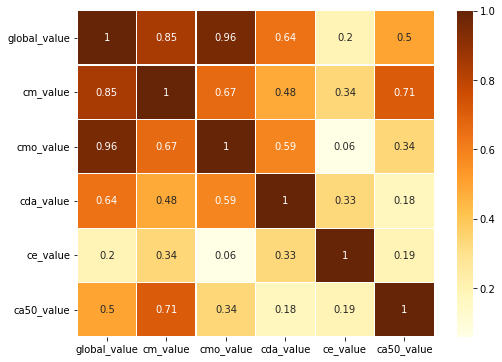

In [ ]:
#plotando com seaborn
plt.figure(figsize=(8, 6))


cmap = "YlOrBr"
sns.heatmap(corr_df, annot=True,  linewidths = .3, cmap = cmap)

plt.show()

#<font color='DarkBlue'>Perguntas de negócio

## 1.Quais são os 3 estados com menor custo atual?

Filtrando os dados de 2021

In [ ]:
dados_2021 = df[df['year'] > 2020]
dados_2021

TypeError: ignored

# <font color = 'Red'>**Considerações e anotações.**

*   Eu **poderia** usar o arquivo direto no Power B.I, mas qual seria a **graça**?! O intuito desse notebook é treinar.
*   Data analisys não é Storytelling, mas eu quis pelo menos deixar este notebook claro para minha leitura posterior e para divulgação.
* Tentar colocar visualizações de outras bibliotecas(ggplot,bokeh)
* Só para efeito de nota, essas seções que o colab criam me irritam **muito** 😠 (28/11)
 *Resolvido (28/11)  
* Pelo fato dos dados estarem distribuidos ao longo de um período (série temporal) todos os valores podem ter uma grande diferença (entre o primeiro período de aquisição e o último). Para este caso, deve-se tomar cuidado com análises estatísticas e possíveis falsos-positivos de outliers.
      

 


> ***Quais perguntas de negócios quero responder:*** 
>1. Quais são os 3 estados com menor custo atual?
>2. Quais são os 3 estados com maior custo atual?
>3. A tendência de aumento/queda nos preços manteve um padrão?
>4. Qual relação podemos fazer com outras fontes de dados? (Ex: preço do aço,juros,PIB,inflação,etc)
>5. Prever os preços para 3 meses

###<font color='Gray'>**Outras notas** ### 

* 30/11- Seria interessante (para um estudo futuro), cruzar informações de fornecedores de 'aço ca50 10mm' para verificar se há alguma correlação com os preços praticados por estado (talvez geolocalização)


* 30/11- Relacionar este indicador com outros indicadores econômicos (juros,PIB,inflação,etc)

* 12/12- Esclarecer como o índice é calculado. (Ex: projeto de casa 'padrão')-> Talvez fique para o artigo/publicação

* 28/01- Introduzir/aperfeiçoar análise estatística (range, desvios, etc)

In [ ]:
#lembre que tem uma página no Notion para anotações para futura publicação
#plotar para visualizar/analisar os dados (Plot Serie Temporal,gráfico de linha)
#lembrar explicar sobre como o custo é calculado: talvez isso fique para a
#publicação/artigo
#devo transformar o df em series?



